In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [36]:
auto = pd.read_csv("c:/Users/Dopamine/Downloads/Auto.csv")

In [38]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [57]:
auto_horsepower_clean = auto.copy()
auto_horsepower_clean['horsepower'] = pd.to_numeric(auto_horsepower_clean['horsepower'], errors='coerce')
auto_horsepower_clean.dropna(subset=['horsepower'], inplace=True)
X = np.array(auto_horsepower_clean['horsepower']).reshape(-1,1)

In [58]:
sum(auto_horsepower_clean['horsepower'].isna())

0

In [62]:
y = auto_horsepower_clean['mpg']
print(y.head())
linreg = LinearRegression().fit(X,y)
print(linreg.score(X,y))
print(linreg.coef_)

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64
0.6059482578894348
[-0.15784473]


In [63]:
linreg.intercept_

39.93586102117047

In [70]:
linreg.predict(np.array([98]).reshape(-1,1))

array([24.46707715])

In [69]:
print(np.array([1,2]).shape)
print(np.array([1,2]).reshape(-1,1).shape)


(2,)
(2, 1)


In [82]:
%matplotlib inline

In [105]:
linreg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [102]:
def lin_poly(x):
    return linreg.intercept_ + x*linreg.coef_[0]
line_x = auto_horsepower_clean['horsepower']
line_y = auto_horsepower_clean['horsepower'].apply(lin_poly)
type(line_y)
line_y.head()

0    19.416046
1    13.891480
2    16.259151
3    16.259151
4    17.837598
Name: horsepower, dtype: float64

pandas.core.series.Series

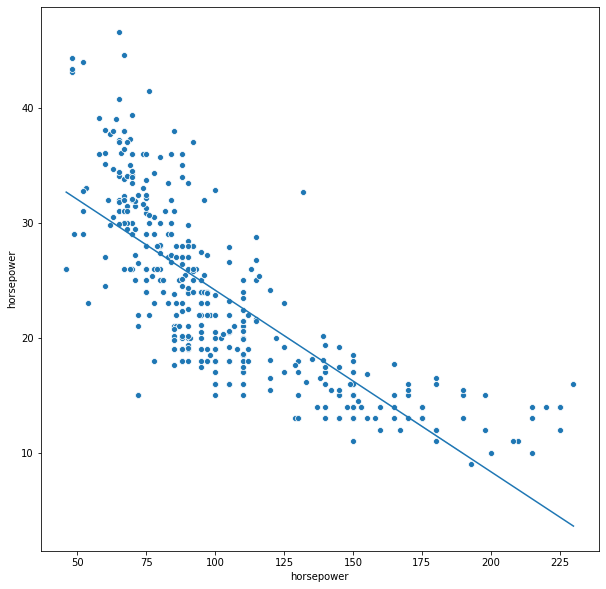

In [104]:
fig, axes = plt.subplots(figsize=(10,10))
axes = sns.scatterplot(ax = axes, x = auto_horsepower_clean['horsepower'], y = y)
axes = sns.lineplot(ax = axes, x = line_x, y = line_y)
                    

In [ ]:
auto_horsepower_clean['horsepower'], y = auto_horsepower_clean['horsepower'].apply(lin_poly))